In [22]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [37]:
using JSON

cross_validation_best_key_Apr_AM = readall("../temp_files/cross_validation_best_key_Apr_AM.json")
cross_validation_best_key_Apr_AM = JSON.parse(cross_validation_best_key_Apr_AM)

cross_validation_best_key_Apr_MD = readall("../temp_files/cross_validation_best_key_Apr_MD.json")
cross_validation_best_key_Apr_MD = JSON.parse(cross_validation_best_key_Apr_MD)

cross_validation_best_key_Apr_PM = readall("../temp_files/cross_validation_best_key_Apr_PM.json")
cross_validation_best_key_Apr_PM = JSON.parse(cross_validation_best_key_Apr_PM)

cross_validation_best_key_Apr_NT = readall("../temp_files/cross_validation_best_key_Apr_NT.json")
cross_validation_best_key_Apr_NT = JSON.parse(cross_validation_best_key_Apr_NT)

cross_validation_best_key_Apr_weekend = readall("../temp_files/cross_validation_best_key_Apr_weekend.json")
cross_validation_best_key_Apr_weekend = JSON.parse(cross_validation_best_key_Apr_weekend)

"(8,0.5,1.0,1)"

In [38]:
coeffs_dict_Apr_AM = readall("../temp_files/coeffs_dict_Apr_AM.json")
coeffs_dict_Apr_AM = JSON.parse(coeffs_dict_Apr_AM)

coeffs_dict_Apr_MD = readall("../temp_files/coeffs_dict_Apr_MD.json")
coeffs_dict_Apr_MD = JSON.parse(coeffs_dict_Apr_MD)

coeffs_dict_Apr_PM = readall("../temp_files/coeffs_dict_Apr_PM.json")
coeffs_dict_Apr_PM = JSON.parse(coeffs_dict_Apr_PM)

coeffs_dict_Apr_NT = readall("../temp_files/coeffs_dict_Apr_NT.json")
coeffs_dict_Apr_NT = JSON.parse(coeffs_dict_Apr_NT)

coeffs_dict_Apr_weekend = readall("../temp_files/coeffs_dict_Apr_weekend.json")
coeffs_dict_Apr_weekend = JSON.parse(coeffs_dict_Apr_weekend)


coeffs_best_Apr_AM = coeffs_dict_Apr_AM[cross_validation_best_key_Apr_AM]
coeffs_best_Apr_MD = coeffs_dict_Apr_MD[cross_validation_best_key_Apr_MD]
coeffs_best_Apr_PM = coeffs_dict_Apr_PM[cross_validation_best_key_Apr_PM]
coeffs_best_Apr_NT = coeffs_dict_Apr_NT[cross_validation_best_key_Apr_NT]
coeffs_best_Apr_weekend = coeffs_dict_Apr_weekend[cross_validation_best_key_Apr_weekend]

9-element Array{Any,1}:
  1.0       
 -0.00465971
  0.0533097 
 -0.2014    
  0.621779  
 -0.897062  
  0.953365  
 -0.461555  
  0.111247  

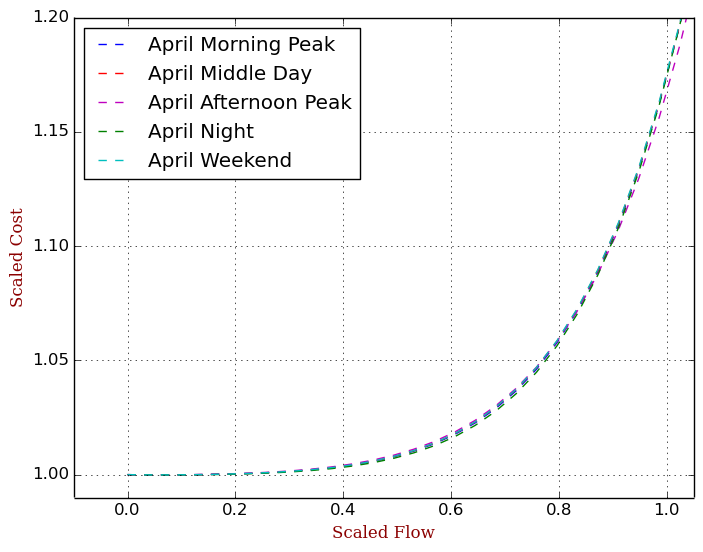

In [39]:
using PyPlot

xs = linspace(0, 1.1, 30)

ys_Apr_AM = map(x->polyEval(coeffs_best_Apr_AM, x), xs)
ys_Apr_MD = map(x->polyEval(coeffs_best_Apr_MD, x), xs)
ys_Apr_PM = map(x->polyEval(coeffs_best_Apr_PM, x), xs)
ys_Apr_NT = map(x->polyEval(coeffs_best_Apr_NT, x), xs)
ys_Apr_weekend = map(x->polyEval(coeffs_best_Apr_weekend, x), xs)

plot(xs, ys_Apr_AM, "--b", label="April Morning Peak")
plot(xs, ys_Apr_MD, "--r", label="April Middle Day")
plot(xs, ys_Apr_PM, "--m", label="April Afternoon Peak")
plot(xs, ys_Apr_NT, "--g", label="April Night")
plot(xs, ys_Apr_weekend, "--c", label="April Weekend")

legend(loc="upper left") 

grid("on")
xlim(-0.1, 1.05);
ylim(0.99, 1.2);

font1 = ["family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Apr.pdf")

In [31]:
cross_validation_best_key_Apr_MD

"(8,0.5,100.0,1)"